# **Import Libraries**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [13]:
df = pd.read_csv('D:\HCMUS\StatisticsLearning\Project\data\en_vi_sents.csv')
df.head()

,en,vi
0,Rachel Pike : The science behind a climate hea...,Khoa học đằng sau một tiêu đề về khí hậu
1,"In 4 minutes , atmospheric chemist Rachel Pike...","Trong 4 phút , chuyên gia hoá học khí quyển Ra..."
2,I 'd like to talk to you today about the scale...,Tôi muốn cho các bạn biết về sự to lớn của nhữ...
3,Headlines that look like this when they have t...,Có những dòng trông như thế này khi bàn về biế...
4,They are both two branches of the same field o...,Cả hai đều là một nhánh của cùng một lĩnh vực ...


# **Visualize**

In [14]:
def word_length(text):
    return len(text.split(" "))

In [15]:
df['en_word_length']=df['en'].apply(word_length)
df['vi_word_length']=df['vi'].apply(word_length)

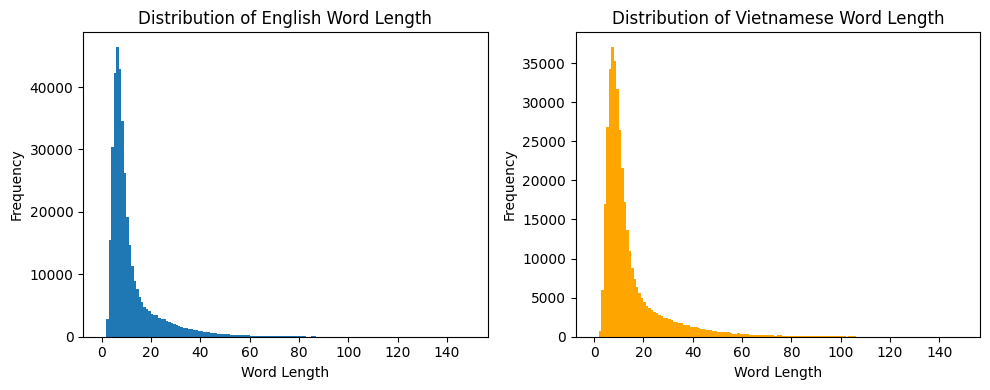

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df['en_word_length'], bins=range(0, 150, 1))
axes[0].set_title('Distribution of English Word Length')
axes[0].set_xlabel('Word Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['vi_word_length'], bins=range(0, 150, 1), color = 'orange')
axes[1].set_title('Distribution of Vietnamese Word Length')
axes[1].set_xlabel('Word Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
df['en_char_length']=df['en'].apply(len)
df['vi_char_length']=df['vi'].apply(len)

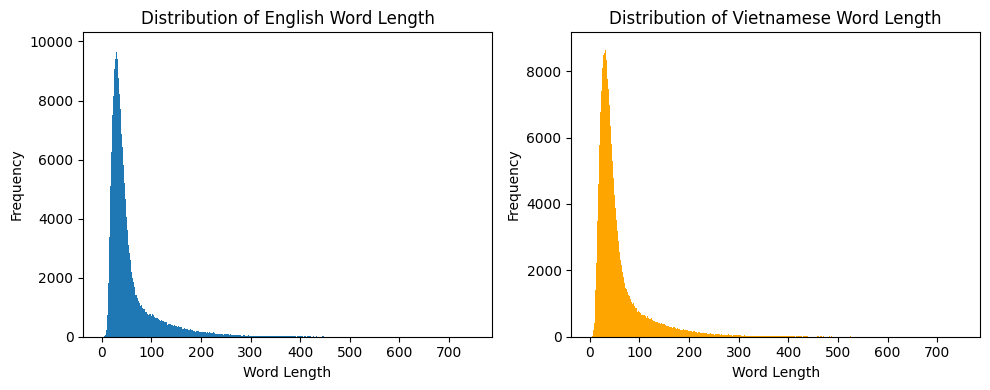

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df['en_char_length'],bins=range(0, 750, 1))
axes[0].set_title('Distribution of English Word Length')
axes[0].set_xlabel('Word Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['vi_char_length'],bins=range(0, 750, 1), color = 'orange')
axes[1].set_title('Distribution of Vietnamese Word Length')
axes[1].set_xlabel('Word Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

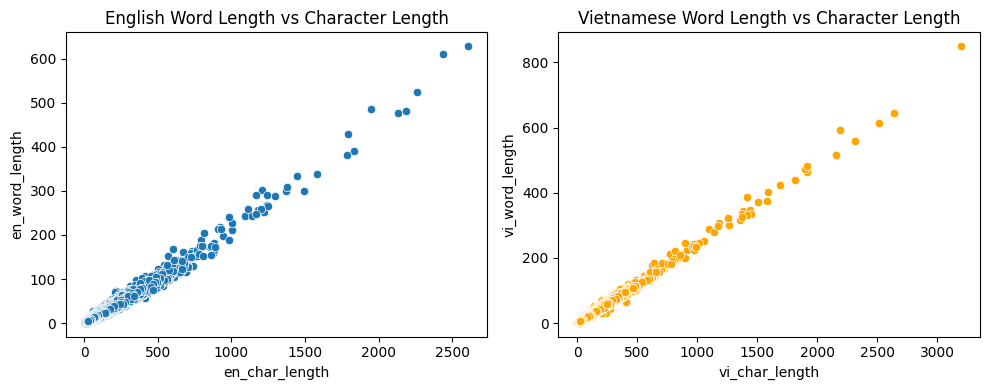

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x='en_char_length', y='en_word_length', data=df, ax=axes[0])
axes[0].set_title('English Word Length vs Character Length')

sns.scatterplot(x='vi_char_length', y='vi_word_length', data=df, ax=axes[1], color= 'orange')
axes[1].set_title('Vietnamese Word Length vs Character Length')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Biểu đồ scatterplot cho en_char_length và en_word_length
sns.scatterplot(x='en_char_length', y='en_word_length', data=df, ax=axes[0])
axes[0].set_title('Scatterplot: English Word Length vs Character Length')

# Biểu đồ scatterplot cho vi_char_length và vi_word_length
sns.scatterplot(x='vi_char_length', y='vi_word_length', data=df, ax=axes[1])
axes[1].set_title('Scatterplot: Vietnamese Word Length vs Character Length')

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [30]:
df['en_unique_word_count'] =df['en'].apply(lambda x: len(set(str(x).split())))
df['vi_unique_word_count'] =df['vi'].apply(lambda x: len(set(str(x).split())))

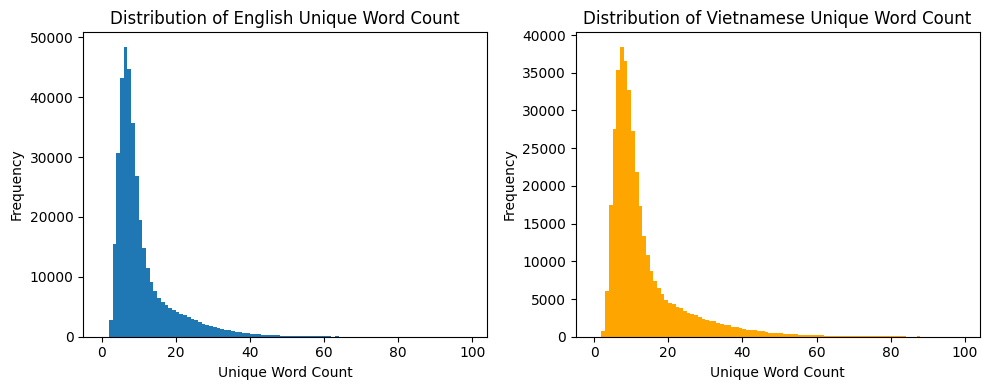

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df['en_unique_word_count'],bins=range(0, 100, 1))
axes[0].set_title('Distribution of English Unique Word Count')
axes[0].set_xlabel('Unique Word Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['vi_unique_word_count'], bins=range(0, 100, 1), color = 'orange')
axes[1].set_title('Distribution of Vietnamese Unique Word Count')
axes[1].set_xlabel('Unique Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

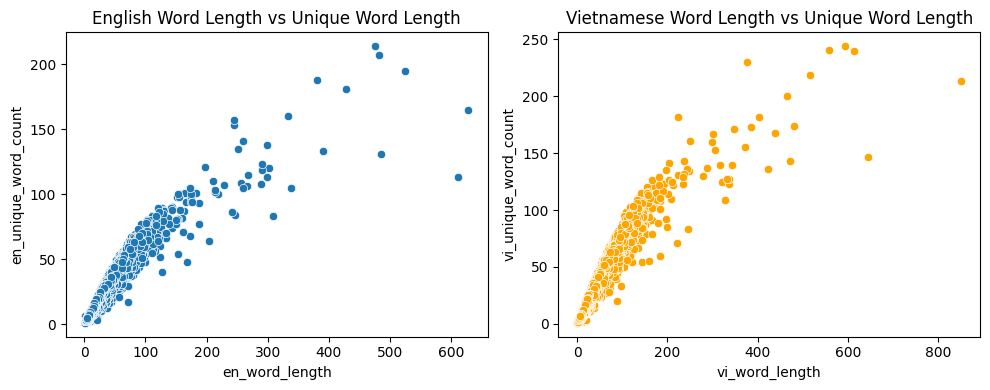

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x='en_word_length', y='en_unique_word_count', data=df, ax=axes[0])
axes[0].set_title('English Word Length vs Unique Word Length')

sns.scatterplot(x='vi_word_length', y='vi_unique_word_count', data=df, ax=axes[1], color= 'orange')
axes[1].set_title('Vietnamese Word Length vs Unique Word Length')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10564\2699745944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

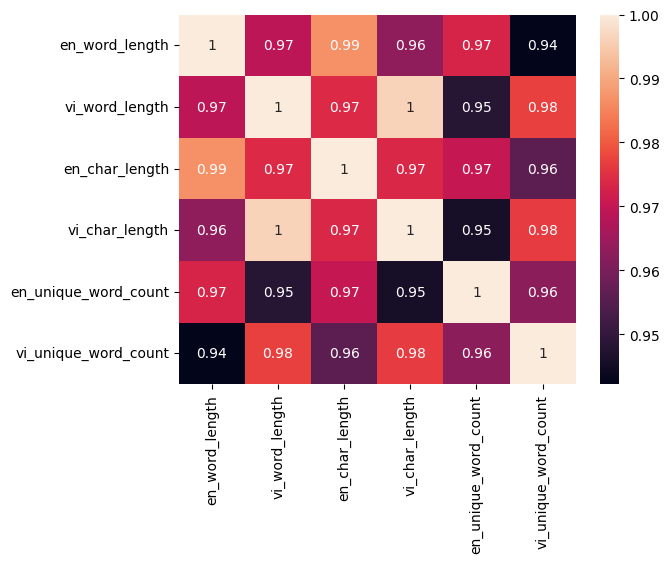

In [35]:
corr=df.corr()
sns.heatmap(corr,annot=True)

## Bi-gram

In [38]:

# Định nghĩa hàm để tạo bigram từ một câu
def create_bigrams(sentence):
    words = sentence.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    return bigrams

# Áp dụng hàm create_bigrams vào cột 'sentence' và lưu kết quả vào cột mới 'bigrams'
df['en_bigrams'] = df['en'].apply(create_bigrams)
df['vi_bigrams'] = df['vi'].apply(create_bigrams)

In [39]:
df[['en','en_bigrams']].head()

,en,en_bigrams
0,Rachel Pike : The science behind a climate hea...,"[(Rachel, Pike), (Pike, :), (:, The), (The, sc..."
1,"In 4 minutes , atmospheric chemist Rachel Pike...","[(In, 4), (4, minutes), (minutes, ,), (,, atmo..."
2,I 'd like to talk to you today about the scale...,"[(I, 'd), ('d, like), (like, to), (to, talk), ..."
3,Headlines that look like this when they have t...,"[(Headlines, that), (that, look), (look, like)..."
4,They are both two branches of the same field o...,"[(They, are), (are, both), (both, two), (two, ..."


In [40]:
df[['vi','vi_bigrams']].head()

,vi,vi_bigrams
0,Khoa học đằng sau một tiêu đề về khí hậu,"[(Khoa, học), (học, đằng), (đằng, sau), (sau, ..."
1,"Trong 4 phút , chuyên gia hoá học khí quyển Ra...","[(Trong, 4), (4, phút), (phút, ,), (,, chuyên)..."
2,Tôi muốn cho các bạn biết về sự to lớn của nhữ...,"[(Tôi, muốn), (muốn, cho), (cho, các), (các, b..."
3,Có những dòng trông như thế này khi bàn về biế...,"[(Có, những), (những, dòng), (dòng, trông), (t..."
4,Cả hai đều là một nhánh của cùng một lĩnh vực ...,"[(Cả, hai), (hai, đều), (đều, là), (là, một), ..."
